# Chapter 6: High Performance Computing
Module 5 of Phys212/Biol212 class
### by Ilya Nemenman, 2016-2020

## Defining High Performance Computing

Nowadays news are full with articles about new technological breakthroughs in artificial intelligence: self-driving cars, automatic translation, and even computer-generated art. What makes all of this possible, among other things, is a dramatic increase in our computational capabilities in the last decade. Interestingly, the speed of computer processors has not changed that much over this time -- an individual processor now is only a bit faster than is used to be ten years ago. What has changed is that we figured out how to put more processors into a single computer (and sometimes dramatically more -- literally thousands of specialized processors in some video cards) and how to make all of these processors to work collectively on solving large computational problems we want to solve. In this module, we discuss the basics of such parallel computing and will figure out how to implement it on your laptops.

<font color='pink'>**ToDo**: need to expand the introduction by adding a few paragraphs on history of HPC</font>

What is high performance computing? To answer this, we need to define a series of terms. 
 - **<font color='red'>Processor</font>**, or Central Processing Unit (**CPU**): The *brain* of the computer, the part in which most computing operations are controlled and executed. 
 - **<font color='red'>Serial Processing</font>**: Execution of a single program step by step on one CPU.
 - **<font color='red'>Sequential Processing</font>**: Execution of multiple programs on a single CPU in a sequence.
 - **<font color='red'>Concurrent Processing</font>**: Execution of multiple programs at the same time. 
 - **<font color='red'>Parallel Processing</font>**: Execution of multiple programs (or parts of the same one) on multiple CPUs. 
 - **<font color='red'>High Performance Computing</font>**: It is basically another name for solving computational problems concurrently on multiple CPUs.
Note that different books define some of these terms differently. However, for this class, we will stick with the definitions above.
 
It gets a bit more complicated than these simple definitions. For example, one can have serial and sequential processing (completing one task before starting the other on a single CPU). One can also have serial and concurrent processing (alternating between two or more tasks on the same single CPU). Finally, one can have true parallel and concurrent processing, which means executing multiple tasks simultaneously at the same instant of time on multiple CPUs.
<font color='pink'>**ToDo**: Show picture of different execution formats</font>

### Organization of Parallel Computing
What are the different ways of organizing parallel processing? We can develop the intuition by considering how you can arrange for multiple people in a group to do a certain complex task that consists of many different subtasks. For example, let's suppose that a group of people are arriving to a supermarket to buy a long list of supplies for a party. It seems reasonable to suppose that many people should be able to complete the shopping process faster than one, but this would require some additional organization to split the overall shopping list into sub-components. How can we organize people to do this? There are many different ways of doing this.
 - The simplest option is not to delegate different parts of the shopping list to different people, but to have just one person to complete all of the steps of the task, while others wait. This is equivalent to sequential processing. The advantages are clearly seen -- we do not need to think how to delegate tasks. Thus, for a short shopping list, this may be the fastest solution -- instead of spending time figuring out who buys what, one person quickly runs into the store and returns. However, for long shopping lists, the disadvantage is also clear -- we are not using the additional processing power of the entire team, and hence get no speedup compared to how long it would take a single person to shop.
 - The second option is to have the group captain assign a list of subtasks to each of the people in the group, and let them all focus on each of their assigned tasks. This incurs communication cost. First, the partitioning of the full list of tasks into pieces must be done, and then these sublists must be communicated to the people.  When they complete their individual tasks, the results of the completion must be communicated to the leader. This communication/organization takes time in its own right, and may make parallel processing not very efficient. Further, there are additional inefficiencies. While the task is being partitioned, the people will be waiting for their assignments, doing nothing. Then some of them will finish their subtasks before the others, and will again wait, doing nothing. However, for a long shopping list, with a smart enough partitioning of tasks that tries to balance the complexity of individual assignments, such parallel shopping can result in a substantial speedup.
 - To avoid wasting time when an individual completes their task, the arrangement above may possibly be improved. For example, when a person finishes his/her task, s/he may be asked to help the others who are still doing theirs. However, this is easier said then done. Whom should they help? To know this, each person must be constantly communicating his/her progress, either broadcasting it to everyone in the group, or at least sending it to the captain. In the former case, everyone would know who needs help. In the latter, everyone who needs more work would contact the capatain for additional instructions. In either case, communication would become a significant bottleneck: either everyone is listening to messages from everyone else (potentially having little time to do actual work!), or a captain may get overwhelmed in keeping track of everyone's progress. In addition, in either case, when help arrives, the task of a worker who is running behind needs to be partitioned again, which will take yet additional time and resources. At some point all of these communication costs may not be worth it!
 - To avoid some of these problems, one may want to duplicate the tasks originally, but prioritize them, so that every person first works on his/her task. And when those are completed, one then switches on the next pre-assigned task, constantly reporting progress. You can fill in the gaps of what kind of problems -- and which communication costs -- this solution carries.
 - Another interesting approach to explore is to have a more hierarchical structure of parallel processing. The first agent may look at the shooping list, and decide that the list is too long to be shopping alone. The agent then divides the list in half, and recruits one additional helper and gives half of the list to him/her. Then the process repeats: both the original agent and the recruit evaluate their capabilties against the job assigned to them, and, if needed, divide their list further into two parts, and recruit additional helpers. This goes on and on, until either the individual shopping assignements are small enough so that recruiting additional help is useless, or until no more free helpers are left. Again, you can fill in the gaps regarding which kind of problems one would experience with this solution
 
>### Your turn 6.1
Suggest one other arrangement not discussed in the lecture notes of how tasks can be divided among multiple workers. 

Note that, in all of these suggestiong (and any of your additional ones), the more complicated the arrangement is, the more communication needs to be done. And communication takes time -- so that, at a certain point, communication costs outweigh the savings one will generate from a complex task-partitioning scheme. This is, unfortunately, the law of parallel processing: simple parallel schemes are inefficient because they do not utilize all of the available resources, and complex schemes are inefficient because they spend too much time on arranging for efficient utilization, rather than actually doing the work. There's often a goldilocks zone, where efficiency is good enough, and communication costs are small enough, for the computation to be the fastest. Landing in this zone is usually the goal.

With these different arrangements, it makes sense to have a bit finer characterization of concurrent / parallel processing, which, as always, requires more definitions. 
 - **<font color ='red'>Parallel processing</font>** per se: Collection of connected, tightly coupled, strongly communicating processors concurrently solving a problem.
 - **<font color ='red'>Distributed processing</font>**: Loosely coupled processors, perhaps great distances from each other, working concurrently on problems with minimal communication among them.
These definitions are a bit sloppy (e.g., what is "strongly" vs "loosely" connected?) -- but we will have to live with them.

True parallel processing is further distinguished by how memory of the computers is organized
 - **<font color ='red'>Shared memory</font>**: Parallel processors access the same memory during concurrent processing, requiring minimal communication beyond the shared memory.
 - **<font color ='red'>Distributed memory</font>**: Each processor has its own memory to operate with, and synchronization of tasks is achieved through communication.
 
In this Module, we will focus on *parallel* processing rather than on *distributed* processing -- so that tasks we will complete will be executed on a single computer (usually your laptop) with multiple CPUs (usually two or four in modern laptop computers). Since all of these CPUs have access to the same memory, it meand that we will be writing the *shared memory* parallel processing programs. 

Crucially, a program written for sequential processing will not execute easily on many processors. It needs to be **<font color='red'>parallelized</font>**, aka **<font color='red'>scaled</font>**, to many processors. This usually involves careful consideration of how concurrent processing is to be organized, how the tasks are to be partitioned, how multiple data streams and execution streams are to be synchronized, how communication is to be arranged, etc. After all is said and done, the program will usually run faster on multiple processors than on a single one, but the costs of parallelization will not be negligible. To understand how useful parallelization is for a specific program, a useful metric is the **<font color='red'>speedup</font>**, which is the ratio of the time it takes to execute a parallelized  program on $n$ processors compared to the time it takes to execute  a sequential version of the task on just one CPU. The speedup of larger than $n$ is essentially impossible to acheive on any but very contrived tasks. Moreover, the speedup is usually less than $n$ (and often *a lot* less than $n$) due to communication costs. 


>### <font color='green'>Track 2: Logical vs. physical CPUs </font> 
<font color ='pink'>**ToDo**: add the discussion.</font> 

### Types of parallel algorithms
<font color='pink'>**ToDo(*: need pictures of different parallelization schemes.</font>

Some problems are easier to parallelize than others, and different approaches are required for parallelization.  For example, if we need to generate many realizations of a process (e.g., recall looking at the variance of many realizations of random walks in the previous chapter), then this is very essy to parallelize -- each of the $n$ available CPUs generates the fraction of the needed data, and this requires very little communication between the processors to achieve, likely resulting in a speedup of almost $n$. On the contrary, if we want to simulate a complex fluid flow, by assigning different processors to compute motion of different parts of the fluid, then the processors must communicate constantly: fluid motionis continuous, and fluid leaving one subvolume must re-emerge on the other. This problem will be much more difficult to parallelize.  

Overall, we will distinguish the following types of parallelization schemes:
 - **<font color='red'>Embarrassingly parallel algorithms</font>**: The task can be divided into subtasks that have virtually no communication. As hinted above, typically problems such as generating statistics (e.g., producing many DLA clusters of Module 4) are embarrassingly parallelizable. For example, you could have run multiple Jupyter notebooks at the same time, and each would produce a single cluster, whose horizontal extent can then be averaged.
 - **<font color='red'>Data partitioning algorithms</font>**: Here the task can be partitioned into subtasks, where the same type of a computation is performed for each of the subtasks, but on different subsets of data. Typically a special privileged *root* process performs the partitioning, and the communication among the subtasks is also handled by the root. As an example, consider calculating a sum of a large array. The data set can be partitioned into parts (by the root), each part can be summed independently, and then the subsums can be added by the root. 
 - **<font color='red'>Divide and conquer algorithms</font>**: Here work is done without a root. Instead, as in the last example about shopping above, each processor gets a task and, if it can't execute it in a requested time, it subdivides the task into two, leaves one half for itself, and recruits another processor for the remaining half. Both of the processors then continue doing the same, until each of the recruited processors has a manageable task. When the tasks are completed, each processor reports its results to the processor who originally gave it the task. 
 - **<font color='red'>Coarsening algorithms</font>**: This is a very special parallelization scheme, only applicable to various multiscale physical systems. Here the processors work on partitioned data, but solve the problem on multiple scales. For example, in a fluid flow problem, one set of processors may track fluctuations in the speed of the fluid flow on the scale of centimeters, and then report to a (smaller) set of processors that track fluctuations on scales of meters, and so on. We will not consider examples of this parallelization scheme in this course. 

For all of these algorithms, it is crucial to think how the data must be organized to speed up communication, and we will devote a lot of time to these questions. Often even the very choice of the paralllelization scheme would depend on these mundane considerations about the organization and the communication.

## Problems to be solved with parallel processing

Which problems can be solved faster using multiple processors? Embarrasingly parallel algorithms are very good for generating a lot of statistics. They often (though not always) work great for agent-based simulations, if agents do not interact a lot. However, they are not good for spatially extended problems, or cellular automata problems. Such problems that we discussed (e.g., DLA, annihilation) can be solved by data partitioning, where each one of the processors analyzes a sub-part of the lattice, and the communication among the processors is very limited, only happening at the edges of the sub-lattices where they meet. 

There is a special type of cellular automata, for which parallel processing is usually used (and, in fact, was developed for originally). These emerge from simulations of what is known as **<font color='red'>partial differential equations</font>**, that is, differential equation that contains unknown multivariable functions and their derivatives with respect to many variables. For example, consider a situation where one is trying to predict weather, or, for simplicity, just the temperature $T$ over some extended spatial range, which is what weather forcasters routinely do. Now the variable $T$ that we care about depends on the spatial coordinates in addition to time, $T=T(x,y,z,t)$. This is in contrast to all previous examples we considered, where the dynamical variables were few, and they depended just on time, such as the coordinate and the angular velocity of the pendulum, $\theta(t), \omega(t)$, or the concentration of nutrients and the number of bacteria, $\rho(t),n(t)$. Variable that are space and time dependent, like the temperature, are known as **<font color='red'>field</font>**. On a digital computer, we usually approximate the continuous coordinates $x,y,z$ as a grid, and so $T(x,y,z,t)$ becomes a set of variables $T(x_i,y_j,z_k,t)$, with the dimensionality of the set being $N=\frac{L_x}{\Delta x}\frac{L_y}{\Delta y}\frac{L_z}{\Delta z}\sim \left(\frac{L_x}{\Delta x}\right)^d$, where $L_x$ is the linear span of the system, $\Delta x$ is the lattice spacing (and similarly for $y$ and $z$), and $d=3$ is the dimension. Even for a reazonably small $\frac{L_x}{\Delta x}\sim 100$, the number of dynamical variables we need to store to describe the dynamics of $T$ is then $N\sim 10^6$. That is, the spatially extended dynamical system is equivalent to a dynamical system with very many (potentially millions or billions) of dynamical variables. As you have observed earlier, solving ODEs for even a few dynamical variables can take a substantial amount of time. It is also clear that this time complexity is going to scale as, at least, $O(N)$, and potentially even worse if many variables interact with each other. Thus the need to use all of the available computational resources (and hence parallelizing the code) for such spatially extended simulations is clear. We will introduce one of such partial differential equations automata here, the *heat diffusion equation*, and show how to solve it on multiple processors. 


>### <font color='green'>Track 2 </font> 
<font color='green'>As another example of a similar spatially extended cellular automaton, notice that the probability distribution of having a certain number of molecules in the Chemical Master Equation (CME), which we studied in Track 2 in the previous module, depends on that number of molecules as well as on time, $P=P(n,t)$. So while the CME does not describe a function $P(n,t)$ for a continuous $n$, it becomes very similar to the discretized dynamics of continuous fields, such as $T$ above, when both are represented on a digital computer. The dimensionality of the dynamics of the CME thus scales as $N\sim \prod N_{{\rm max},i}\sim N_{\rm max}^d$, where $N_{{\rm max},i}$ is the maximum allowable number of molecules of a chemical species $i$ involved in the process, and $d$ is the dimensionality, or the number of these species. Thus if the number of chemical species involved in the dynamics is more than a few (and it can be arbitrary large!), the CME becomes a system of astronomically many coupled ODEs, and parallelizing the code becomes even more important than for fields in real spatial dimensions.</font>  


### Newton's law of cooling and Fourier's law of heat conductance
Let's start with a simple example. Suppose you have two bodies in contact with temperatures $T_1$ and $T_2$. How do their temperatures depend on time? To develop a mathematical model of this process, we note that the heat flow is directional: heat flows from the high temperature body to the low temperature one. This means that the heat transfer should be proportional to the odd power of the temperature difference. The simplest such relation (which is also supported experimentally) is that the rate of heat transfer is *proportional to the difference in temperatures between the two bodies*. In other words, 
$$\frac{ dQ_{1\to2}}{dt} = \kappa (T_1-T_2),$$
where $\Delta Q_{1\to2}$ is the heat that went from body 1 to body 2, $T_i$ are their respective temperatures, and $\kappa$ is some coefficient of proprtionality, which will depend on the material the bodies are made from, the shape of the bodies, their contact area, and so on. Notice that the sign here is such that the heat, indeed, goes from the hot body to the cold one. We can extend this a bit by noticing that the temperature of a body and the total amount of heat in it are proportional to each other -- the more heat there is, the higher the temperature:   
$$Q_i=C_iT_i.$$
Here the coefficient of proportionality is known as the <font color='red'>**heat capacity**</font>. In other words, for example, $dT_1=- C_1dQ_{1\to2}=C_1dQ_{2\to1}$. Combining with the previous equation, we get:
$$\frac{ dT_{1}}{dt} = k (T_2-T_1),$$
where $k$ now combines both $\kappa$ and $C_1$. 

<font color='pink'>**ToDo:** add picture of temperature as 1-d field</font> 
Now consider a situation where $T$ is, in fact, a field $T(x,t)$, so that what we called $T_1$ and $T_2$ are instead $T(x)$ and $T(x+dx)$, and $T_2-T_1\to dT(x)$. In the $dQ_{1\to2}$ equation above, $\kappa(T_2-T_1)$ is then replaced with $k\frac{\partial T}{\partial x}$. (For those of you not familiar with multivariate calculus, the expression $\partial T$ stands for a difference in $T$ only due to changes in space, while considering time constant.) As a result, if we define $j(x)=\frac{dQ(x)}{dt}$ -- <font color='red'>**the heat flux**</font> -- we get:
$$j= - k\frac{\partial T}{\partial x},$$
where the minus sign signifies, as always, that the flux goes from the hot to the cold area.

>### <font color='green'>Track 2: Higher dimensions</font>
<font color='green'>Those of you who have taken multivariate calculus, will easily derive that, in more than one spatial dimension, the equation for the heat flux transforms into:
   $$\vec{j}= - k\nabla T.$$
</font>

All of the equations above describe basically just one phenomenon: the heat flows from a hot body to a cold one in proportion to the temperature difference. The equations just describe slightly different forms of this law: are we are talking above differential changes of temperature over space, or differences between finite bodies? Are we considering changes in temperature vs. heat? Depending on these details, this one law then is known as either the *Newton's law of cooling* or the *Fourier's law of heat conductance.*

Interestingly, if we are considering exchange of particles between two reservoirs through diffusion, so that the concentration is measured by the particle density $\rho_1$ and $\rho_2$ (or, for a continuous case, $\rho(x)$), then the particles diffuse from the area where there are more of them to the area, where there are fewer. As a result, we can repeat the same arguments and arrive to the law of particle flux due to diffusion:
$$j= - D\frac{\partial \rho}{\partial x}.$$
This is known as the *Fick's first law of diffusion*, and the coefficent $D$ is the diffusion constant (the same diffusion constant we introduced for random walks in the previous module). 

### Partial Differential Equations (PDEs): The diffusion equation cellular automaton
In the examples above, we only considered the dynamics of the temperature for two bodies exchanging heat. Now let's consider an extended body in one dimension, which we will discretize in small elements of length $\Delta x$, and the temperature becomes then $T(i\Delta x,t)=T_i(t)$. If we want to understand the dynamics of $T(i\Delta x,t)$, we need to consider two heat fluxes: between points $i-1$ and $i$, and between points $i$ and $i+1$. Then the total change of heat at the point $i$ is:
$$\frac{dQ_i}{dt}=-\frac{\kappa}{\Delta x} [T_i(t)-T_{i-1}(t)] + \frac{\kappa}{\Delta x}  [T_{i+1}(t)-T_{i}(t)]= \frac{\kappa}{\Delta x}  [ T_{i+1}(t)+T_{i-1}(t) - 2 T_i(t)].$$
Notice that I carry aound the weird coefficient $\frac{\kappa}{\Delta x}$. This is because, in this case, $T_i-T_{i-1}$ and $T_{i+1}-T_{i}$ are both *infinitesimal* (since we are looking at temperature changes over very small distances), and the weird factor of $1/\Delta x$ is needed to compensate for this.  

Now, as always, the heat flux will change the temperature $(C\Delta x)dT= dQ$, where $C\Delta x$ is the heat capacity of the small segment of the material of length $\Delta x$, and $C$ is then the **<font color='red'>specific heat capacity</font>** (again, notice that we have to be careful with the factors of $dx$). With this definition, we get equation for the dynamics of the temperature at a specific point 
$$\frac{dT(x,t)}{dt}=k \frac{ T(x-\Delta x,t)+T(x+\Delta x,t) - 2 T(x,t)}{\Delta x^2}.$$
This is a discretized form of the following partial differetial equation:
$$\frac{dT(x,t)}{dt}=k \frac{\partial^2 T}{\partial x^2}.$$

If we have a two-dimensional system, so that $T=T(x,y,t)$, and if we choose $\Delta x=\Delta y$, then this easily generalizes to:
$$\frac{dT(x,y,t)}{dt}=k \frac{T(x-\Delta x,y,t)+T(x+\Delta x,y, t) + T(x,y-\Delta x,t) + T(x,y+\Delta y,t) - 4 T(x,t)}{\Delta x^2}.$$
What we wrote above is the discretized version of the heat diffusion equation. Replacing $T$ with $\rho$ and $k$ with $D$, this is also a discretized version of the diffusion equation, also known as the Fick's second law of diffusion. 
>### Your turn 6.2:
Derive the two-dimensional and the three-dimensional heat diffusion equation.

>### <font color='green'>Track 2: Higher dimensions</font>
<font color='green'>Those of you who have taken multivariate calculus, will easily derive that, in more than one spatial dimension, the heat diffusion equation becomes 
    $$\frac{dT(x,t)}{dt}=k \nabla^2 T.$$
 </font>
 
The discretized version of the diffusion equation is very suggestive: it is a set of coupled ODEs, one ODE for each spatial point on a lattice $(x,y)$, and the dynamics of temporature at every point depends on the current temperature at neighbors. We can solve this using the standard forward Euler algorithm for a system of ODEs. That is, in two dimensions, with $\Delta x=\Delta y$:
$$\begin{align}
T(i\Delta x, j\Delta x, t+\Delta t) =& T(i\Delta x, j\Delta y, t) \\&+ k\Delta t  \frac{ T((i-1)\Delta x, j\Delta x, t)+T((i+1)\Delta x, j\Delta x, t) + T(i\Delta x, (j-1)\Delta x, t)  + T(i\Delta x, (j+1)\Delta x, t)- 4 T(i\Delta x,j\Delta x, t)}{\Delta x^2}.\end{align}$$
The (deterministic) cellular automaton form of this solution is now clear: the state of every cell (aka, lattice point) is its temperature value. The state changes in an interaction with all nearby cells, and the cycle repeats.

The rule by which the temperature changes is interesting. First, we subtract the current local temperature at a point from the average value of all nearby temperatures. If the local temperature is higher than the average, then the change in the local temperature is negative (the heat flows away from the point). If the local temperature is  lower than the average, then the heat flows toward the center, and the temperature increases. Thus the steady state of the diffusion equation (reminder: the steady state is achieved when the state variables of the system -- here $T$ -- stop changing with time) is achieved when every temperature in the tracked volume is equal to the average temperature around it. This only happens in the thermal equilibrium. In particular, when we start with the temperature on the boundary of the body being constant, then the equilibrium is when *all* temperatures in the volume are constant. This agrees with our intuition -- temperature in a body that has a constant temperature $T$ on its surface equilibrates to the same value as on the surface.

A few key technical comments about the discretized heat diffusion equation are in order. First, in solving the equation solution, we *should* use $\Delta x=\Delta y$, and we *should* use the Euler scheme, but *not* more complicated Runge-Kutta or similar schemes. This is because the diffusion equation exhibits **<font color='red'>instabilities</font>**: everpresent small numerical truncation errors generally grow exponentially, and make a solution incorrect beyond a few $\Delta t$'s. Only specific numerical algorithms result in cancellation of these instabilities and in relatively accurate solutions. Luckily, the forward Euler scheme is one of those! While a detailed discussion of instabilities in PDEs is beyond the scope of this class, you should remember that instabilitiles exist, and are a problem in complex spatially extended simulations, so that not every agorithm translates easily from the ODE context to the PDE one.

### Boundary and initial conditions
The heat diffusion equation in the Euler finite difference cellular automaton form takes the current value of the discretized field of temperatures and calculates the values of the temperature one step forward in time from them. Thus we need to have the initial condition specified: $T(x,y,t=0)=T_0(x,y)$ must be given, as for any set of ODEs. Then for any point that is inside the range, in which we are evolving the temeprature, will be able to calculate the future value of the temperature from its current value. But we cannot do this for the boundary of the range -- evolution forward in time requires calculation of the average temperature around a point, and we need to define what we mean by *around* for any point on the boundary. Specification of what happens on the boundary is known as the <font color='red'>boundary condition</font>. There are three types of boundary conditions that we use routinely in the diffusion equation and many other PDE-related problems. We will consider them one at a time.

#### Absorbing boundary conditions
Imagine that the boundary is kept externally at a fixed temperature. Physically, this can mean that the body is in contact with a heat source or sink. Then any heat that arrives to the boundary in excess to what is needed to keep it at the boundary temperature will get absorbed, given rise to what we call the <font color='red'>**absorbing boundary conditions**</font>. Computationally, this is easy to implement. In two dimensions, suppose we have lattice $x=i\Delta x, y=j\Delta x$, where $i=1\dots L_x$, and $j=1\dots L_y$ (extensions to other dimensions are easy). Then we can extend the lattice by creating a rim around it, $i=0$ (left rim), $j=0$ (bottom rim), $i=L_x+1$ (right rim), and $j=L_y+1$ (top rim). We can keep the temperature at the rim to be whatever is specified by the boundary conditions, and then every point inside the lattice has its four neighbors! So we can evaluate the next state of every point inside the range using the Euler diffusion cellualr automaton, and the boundaries go along for the ride. With initial conditions specified, this is all we need to solve the problem. It's also clear how to verify if absorbing boundary conditions were set up well: if we run the simulation till the steady state, the temperature of the entire object should settle to the temperature of the boundary (if the latter is constant everywhere).

#### Reflecting boundary conditions
Suppose the object, in which we are measuring the temperature relaxation is surround by a very good thermal insulator. Then the heat cannot escape the object, and no new heat can enter. How do we model this? Let's again extend the lattice with a one-cell rim around it. And let's at every time step set the temperature value at the rim equal to the first cell in the body: $T(0,y,t)=T(1,y,t)$, $T(L_x+1,y,t)=T(L_x,y,t)$, $T(x,0,t)=T(x,1,t)$, $T(x,L_y+1,t)=T(x,L_y,t)$. Now we can update the interior of the body at every time step, since the interior has all four neighbors. At the sam time, since the temperature at the boundary is the same as at the first interior point, there's no flux towards or from the boundary, and the heat won't be lost. That is, the heat coming to the boundary gets reflected back into the body, and hence the name: **<font color='red'>reflecting boundary conditions</font>**. This also suggest a verification for whether the reflecting boundary condition is set up correctly: all throughout the dynamics, the total heat (sum of all temperatures) in the body should not change with time. 

#### Periodic boundary conditions
This is a bit of a theorist's idealization and not physical, but sometimes we need a system that is totally translationally symmetric, so that every point in it is as good as any other point. We can achieve this, again, by adding a rim around the lattice, and now setting at every time step: $T(0,y,t)=T(L_x,y,t)$, $T(L_x+1,y,t)=T(0,y,t)$, $T(x,0,t)=T(x,L_y,t)$, $T(x,L_y+1,t)=T(x,0,t)$ -- that is, the 0'th point on the lattice becomes equal to the $L$th, and the $L+1$st to the first. The lattice becomes periodic -- all the heat that escapes at the left reemerges on the right (and vice versa), and all the heat that escapes at the bottom reemerges from the top (and vice versa) -- hence the name **<font color='red'>periodic boundary condition</font>**. The periodicity also suggests a simple check for correctness -- the value of the temperature should be continuous across the boundary and into the other side of the lattice. And, similarly, to the reflecting condition, the total amount of heat the system must not change with time.

## Solving the Diffusion Equation using Python
The next Python code cells define all the functions needed to solve the the diffusion equation on a lattice. We start first with the customary initialization and import of all the necessary nmodules.

In [1]:
# Initialization block
import numpy as np
import time
import matplotlib.pyplot as plt

The solution itself will consist of a few steps. First, we define the function `diffusion()`, which implements the single step of the Euler finite difference cellular automaton for solving the diffusion equation. Second, we define the function `reflecting()`, which implements the reflecting bondary condition (you will have to define functions for other boundary conditions). Third, we define the function `sequential()`, which solves the diffusion equation by taking a lattice, calling a chosen boundary condition function, then calling the `diffusion()` function to perform one time step, and then repeating the boundary condition/time step for as long as needed. Finally, the main program initializes all of the parameters, calls the sequential solver, and prints the output.  

In [2]:
# One step of the diffusion cellular automaton
def diffusion(D, dx, dt, u):
    """ 
    Compute one forward step in the temporal evolution of the diffusion equation using the
    the forward Euler discretization scheme.
    Usage: 
      u_next = diffusion(D, dx, dt, u)

    Arguments:
        D: diffusion constant
        dt: step size in time
        dx: step size in space
        u: concentration on lattice points of diffusing quantity, assumed (Lx+2)*(Ly+2) because of the
           boundary conditions
    
    Return: 
        u_next: u at the next time step
        
    Note that we assume that the lattice is enlarged with the boundary rim in all directions, 
    and the rim is used to implement the boundary conditions. Thus the actual lattice is Lx*Ly, 
    and we only need to propagate these internal points forward in time. 
    """
    Lx = u.shape[0] - 2 # Lx of the grid
    Ly = u.shape[1] - 2 # Ly of the grid
    
    u_next = u[1:Lx+1,1:Ly+1] + (dt*D/dx**2)* ( -4*u[1:Lx+1,1:Ly+1] + u[0:Lx,1:Ly+1] +
                                    + u[2:Lx+2,1:Ly+1] + u[1:Lx+1,0:Ly] + u[1:Lx+1,2:Lx+2] )

    # we return the interior of the lattice Lx*Ly at the next time point
    return u_next


# Reflecting boundary condition
def reflecting(u):
    """ 
    Sets up reflecting boundary conditions. For this, the lattice, on which the diffusion equation is solved,
    is extended by 1 in all directions, and the boundary columns and rows are duplicated (see lecture notes
    for a detailed explanation).
    
    Usage: 
        u_bnd = reflecting(u)
      
    Arguments:
        u: concentration on lattice points of diffusing quantity, assumed (Lx)*(Ly) 
    
    Return: 
        u_bnd: u with the boundary rim with reflecting conditions set, size (Lx+2)*(Ly+2)
    """
    Lx = u.shape[0]  # Lx of the grid
    Ly = u.shape[1]  # Ly of the grid

    u_bnd = np.zeros((Lx+2,Ly+2))  # setting up the extended grid
    u_bnd[1:Lx+1,1:Ly+1] = u       # copying the bulk of the grid
    u_bnd[0, 1:Ly+1] = u[0, :]     # setting the top boundary - by copying the top row
    u_bnd[Lx+1, 1:Ly+1] = u[-1, :] # setting the bottom boundary - by copying the bottom row
    u_bnd[1:Lx+1, 0] = u[:, 0]     # setting the left boundary - by copying the left column
    u_bnd[1:Lx+1, Ly+1] = u[:, -1] # setting the right boundary - by copying the right colimn
    
    # now return the extended matrix
    return u_bnd


# sequential solution of the diffusion equation
def sequential(initial, D, T, dx, dt, boundary):
    ''' 
    Sequential processing solution of the diffusion equation in the forward Euler form.
    Usage: 
        grid = sequential(initial, D, T, dx, dt, boundary)
      
    Arguments:
        initial: rectangular lattice of initial heat distribution on the lattice
        D: diffusion constant
        T: time, for which we solve the problem
        dx: lattice spacing (assumed the same in x and y direction)
        dt: time step
        boundary: function that expands the lattice by 1 in each direction and sets up 
            the boundary conditions
      
    Return:
        grid: lattice the size of initial with the solution of the diffusion equation after time T
    '''
    
    grid = initial   # setting up the initial condition
    
    # loop over solution time
    for t in np.arange(int(T/dt)):
        # apply the boundary condition
        grid_bnd = boundary(grid) 
        # one step forward in the Euler solution
        grid = diffusion (D, dx, dt, grid_bnd)
        if (np.round(t/100)==t/100):
            print('Solving time step t = '  + str(t) +'.')
                
                       
    return grid

Notice that we made a lot of semi-arbitrary choices above, some good, and some questionable. For example, the `reflecting()` boundary condition function creates a new array with a rim around the old one, rather than returning the old array, just slices differently. This is clearly slower, because we need to copy numbers in this array. On the other hand, this makes it similar to how we would implement other boundary conditions. Specifically, while periodic conditions again can be done with slicing, for the absorbing conditions, there is no way of just slicing the array. Indeed, the conditions are set *externally*, and so the only way to program this would be either to have the lattice copied, or the conditions passes to the `diffusion()` function as additional arguments. The latter would mean that we have to write multiple different diffusion functions, and i don't like this. The former would mean that somtimes the boundary coundition function returns a new array, and sometimes a slice of the old array. And this may become confusing, and the inconsistency is dangerous -- remember that if, by mistake, we were to modify a variable pointing to a slice, we would modify the original array as well!  

Additional choice i made above it to have the function `sequential()` to take, as an argument, a name of the function that sets up the boundary conditions. This is potentially a problem as well, since the reflecting or the periodic conditions do not require any more information, while to set up the absorbing conditions, one would require a value of the temperature, at which the boundary is kept. This value, presumably, would need to be passed as an argument to the `absorbing()` function if we were to write it, but the code above is not set for this. Additionally, it may be that the absorbing condition has a temprature on the boundary that is position-dependent, $T=T(x,y)$. This would mean that not just one value, but an array of boundary temperatures would need to be passed to the function. There are many choices to make, and sometimes the choices are not obvious (And we may need to revisit them when we talk about multiprocessing). Crucially, you will need to think about these choices when you work on one of the exercises below.

Finally, we can write the main program that implements the sequential solution of the diffusion equation. 

Solving time step t = 0.
Solving time step t = 100.
Solving time step t = 200.
Solving time step t = 300.
Solving time step t = 400.
Solving time step t = 500.
Solving time step t = 600.
Solving time step t = 700.
Solving time step t = 800.
Solving time step t = 900.
Sequential processing took 19.095986127853394s


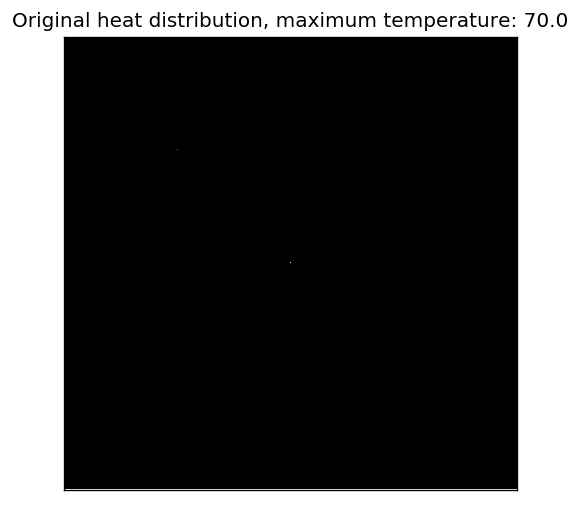

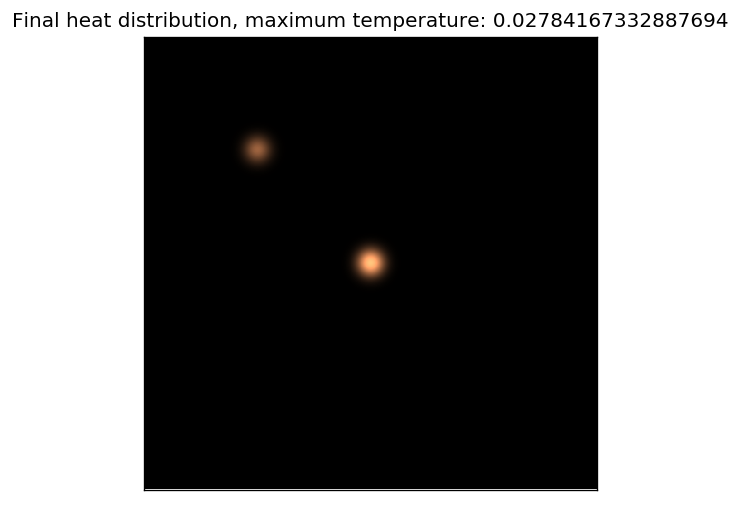

In [3]:
# Initialization:

dx = 0.5 # the lattice spacing; we will use the same lattice spacing in x and y directions, in meters
dt = 0.1 # time step, sec
L = 500  # system shape is square for convenience, in meters
T = 100  # integration time, sec
D = 0.5  # diffusion constant, in m/s^2

# initial heat distribution
grid_init = np.zeros((int(L/dx),int(L/dx))) 
gridsize = grid_init.shape
grid_init[int(gridsize[0] / 2), int(gridsize[1] / 2)] = 70   # put a point source in the center, with intensity 70
grid_init[int(gridsize[0] / 4), int(gridsize[1] / 4)] = 35   # put a point source at a quarter corner, intensity 35

# solving the problem
ts = time.time()  # measure computation time
grid_end = sequential (grid_init, D, T, dx, dt, reflecting)
print('Sequential processing took {}s'.format(time.time() - ts))

# now doing the plotting
fig, ax = plt.subplots(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.imshow(grid_init, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
plt.xticks([]); 
plt.yticks([]);
plt.title('Original heat distribution, maximum temperature: {}'.format(np.max(grid_init)))
plt.show()

fig, ax = plt.subplots(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.imshow(grid_end, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
plt.xticks([]); 
plt.yticks([]);
plt.title('Final heat distribution, maximum temperature: {}'.format(np.max(grid_end)))
plt.show()


>### Your turn 6.3
Time the solution of the diffusion equation for different $L$ at fixed $\Delta x$. How do you expect the complexity of the problem to grown with $L$? How does it grow with $L$?

>### Your turn 6.4
Write functions to implement absorbing and periodic boundary conditions. While the periodic conditions are simple, the absorbing conditions may require more work (see the discussion in the text) because they need an argument for the value of the temperature at the boundary. There are multiple ways of implementing this. First, you may have the temperature at the boundary (either a single constant, or the entire $T(x,y)$ on the boundary rim) as a global variable, and then your `absorbing()` function would use it. Second, you may change the `sequential()` function in a way to allow for a variable number of arguments, one of which -- if it is set --  could be the boundary temperate, and then to pass this variable set of arguments to the function encoded in the argument `boundary`, which can now be your `absorbing()` function. Third you can discard usage of separate `absorbing()`, `reflecting()`, or `periodic()` functions, and instead write a single `boundary_rim()` function, which woud take as the arguments the lattice and the four boundary arrays (left, right, top, bottom), and then different boundary conditions would be implemented inside the `sequential()` function, which would pass different boundary arrays as arguments to the `boundary_rim()`. Or you can try something totally different. It's your choice. When the program is working, explore how the heat diffuses in this system. For this you may need to decrease $L$ and increase $T$ (keep other parameters stationary for now). Verify your boundary condition functions as discussed in the lecture notes.

>### Your turn 6.5
The Euler finite difference scheme for solving the diffusion equation has a well-known instability, called the *von Neumann* instability. When $r=\frac{D\Delta t}{\Delta x^2}>1/2$, the numerical solution behaves erratically, starts oscillating spatially and temproally, and eventually diverges. This critical value is correct for an infinite size system, and problems may emerge even earlier when the system size is smaller. For the parameters in the code above, we have  $r=\frac{D\Delta t}{\Delta x^2} =\frac{0.5\times 0.1}{.5^2} = 0.2<0.5$. Thus the solution should be stable (and it is). Change $D,\Delta x, \Delta t$ and observe what happens when you transition from $r=0.2$ to $r=0.6$. Then explore other more extremevalues of $r$.

## Multiprocessing module
It is crucial that you read the documentation for this module and understand it well https://docs.python.org/2/library/multiprocessing.html. This is quite probably the most complicated Python concept that we have studied to date, and this notebook cannot do it justice.

First let's load the multiprocessing module, and explore which functions it provides.

In [4]:
import multiprocessing as mp
dir(mp)

['Array',
 'AuthenticationError',
 'Barrier',
 'BoundedSemaphore',
 'BufferTooShort',
 'Condition',
 'Event',
 'JoinableQueue',
 'Lock',
 'Manager',
 'Pipe',
 'Pool',
 'Process',
 'ProcessError',
 'Queue',
 'RLock',
 'RawArray',
 'RawValue',
 'SUBDEBUG',
 'SUBWARNING',
 'Semaphore',
 'SimpleQueue',
 'TimeoutError',
 'Value',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'active_children',
 'allow_connection_pickling',
 'context',
 'cpu_count',
 'current_process',
 'freeze_support',
 'get_all_start_methods',
 'get_context',
 'get_logger',
 'get_start_method',
 'log_to_stderr',
 'process',
 'reducer',
 'reduction',
 'set_executable',
 'set_forkserver_preload',
 'set_start_method',
 'sys']

The function `mp.cpu_count()` returns the number of available CPUs on the computer. This is the number of *logical* CPUs -- and usually, when we design our concurrent processing program, we should set the number of workers working in parallel to be equal to this number: any fewer or any more than that will likely result in a slower execution. In the former case, we will not be using all of the resources of the computer, since some of the processors will be waiting unused. In the second, we will be spending too much time on communication among the workers. 

This is how many processors I have on my machine: 

In [5]:
print('Number of processors = ' +str(mp.cpu_count()) +'.') # this counts logical cpus

Number of processors = 4.


>### Your turn 6.6
How many logical processors does your computer have?

Now we can do our first program that would utilize multiple processors for concurrent processing. We will do summation of a set of numbers. I deliberately make the summation very inefficient: we are going to execute a `for` loop over the array, which is slow. However, increasing the complexity of the task by making it less efficient will make it easier to elucidate more clearly the advantage of concurrent processing. 

We will use the function `mp.Pool()` and the associated support functions to perform this concurrent task. First, `Pool()` creates a *pool* (a set) of workers -- subprograms (subprocess) that are available to execute the task concurrently. The main program then becomes the root -- the captain in our example above, who doesn't do any computation itself, but rather distributes the subtasks among the workers, ensures communication, and collects the results. `Pool` implements a *data partitioning* scheme of multiprocessing. Even more specifically, it implements data partitioning in such a way that every worker does the same computation (executes the same functions) on every subset of the data available. This is achieved by the method `map()` that every pool of workers has -- the method takes the same function and applies it to a list of data objectes, so that each worker applies the same function to one element in the list. The creation of the list is the job of the root program, as well as assembly of the results of these workers' work. Let's see how this works now.

The cells below illustrate a simple example of multiplrocessing. We will sum a large array of numbers. First we will do it sequentially, and then concurrently with multiple workers, and compare results. For the concurrent processing, we must first take the array of numbers and to transform it into a a list of subarrays, and then the function `map()` can take the pool of workers and apply each worker to each element of the list. Finally we need to sum the results of the list of these subsums.

In [6]:
# Initialization block
import numpy as np
import time
import matplotlib.pyplot as plt
import multiprocessing as mp

# summing integers
def sumnums(nums):
    '''
    The function sums integers in an array.
    Usage:
      s = sumnums(nums)
    
    Arguments:
      nums: array of integers
      
    Return:
      s: sum of the array
    
    The function is deliberately written not efficiently (doing a for loop over the array), so that it 
    takes a longer time to execute, and the effect of multiprocessing is more pronounced.
    '''
    s = 0
    for x in nums:
        s += x
    return s


# sequential processing
def sum_sequential():
    '''
    The function sums integers in an array sequentially.
    Usage:
      s = sum_sequential()
    
    Arguments: none
      
    Return:
      s: sum of the array
    '''
    
    ts = time.time()                    # measure computation time
    s = sumnums(range(maxnum))          # sum maxnum integers, starting from zero
    print('Sequential processing took {}s'.format(time.time() - ts))
    
    return s


# parallel processing
def sum_parallel():
    '''
    The function sums integers in an array concurrently.
    Usage:
      s = sum_parallel()
    
    Arguments: none
      
    Return:
      s: sum of the array
    '''
    
    # now on to parallel processing
    if __name__=='__main__':  # see discussion of this in the text below    
        n_w = 4               # how many workers to use?
        ts = time.time()      # starting time
        pool = mp.Pool(processes = n_w)        # create a pool of n_w workers
        # make a list subarrays
        # Python knowledge check: make sure that you understand the command below
        # and that you understand what happens if maxnum is not divisible by n_w
        numlist = [range(int(maxnum/n_w*i), int(maxnum/n_w*(i+1))) for i in range(n_w)]   
        subsums = pool.map(sumnums, numlist)   # calculate sums of each subarray concurrently using map()
        s  = sumnums(subsums)                  # now sum the subsums
        print('Parallel processing took {}s'.format(time.time() - ts))
    else:
        s = 0
        
    return s

# Main program

# how many integers will we sum?
maxnum = 2**25    

s_s = sum_sequential()
s_p = sum_parallel()

print("Sum of numbers from 0 to %d: parallel processing - %d, sequential processing - %d." % (maxnum, s_p, s_s))

Sequential processing took 5.363890171051025s
Parallel processing took 1.7803399562835693s
Sum of numbers from 0 to 33554432: parallel processing - 562949936644096, sequential processing - 562949936644096.


>### Your turn 6.7
Become familiar with the simple concurrent summation of numbers. Run the code with different values of `n_w`, including values that are not divisors of `maxnum`. Does the program handle this well? Plot the speedup due to the parallel execution time as a function of `n_w` (you may need to average the run times over a few equivalent runs, to avoid fluctuations due to unrelated work that your computer performs). What is the best value of `n_w` for speed? How does it compare with your number of CPUs?

>### Your turn 6.8
Explain why the speedup is never as high as the number of CPUs.


>### Your turn 6.9
What happens if the number of workers in the `pool` above is different from the number of elements in the `numlist`? Try this for yourself when the number of workers is too large or too small.

Note the check for the `__name__` in the code above. Specifically, what this does it to check whether the program is being executed by the main Python kernel, or whether we are trying to execute this within a child. Also note that I defined `sum_sequential()` and `sum_parallel()` functions, which we only use once from the main code. Why this complication? 

The answers are subtle. And both of them relate to how multiprocessing is implemented in a Unix based operating system (Mac or Linux) vs in Windows. On Unix machines, neither of these complications are required (though still useful), but they are essential on Windows machines. Here's why. 

Specifically, when you apply the `map()` function, what happens on a Mac or another Unix-based machine is that we create child processes. Each child processes will have access to all of the same data as the root process has. In fact, all of the data will be copied as many times as there are child processes, and each child will work on its own copy (this is one reason why having too many workers is not a good idea: copying takes time and memory). After this copying the children start execution -- and any of the modules that you imported in the main code, with all of their variables and data are available for each child. 

In contrast, multiprocessing on Windows is tricky. When `map()` creates child processes and gives control of the CPUs to them, Windows does not have a capacity to make all of the imported modules and their objects available to the children. So, in the Windows implementation of Python multiprocessing, data stuctures in the main program are not visible to the children, and each module previously imported by the main program will be reimported automatically by each child anew. In other words, objects created by the main program per se will not be accessible by the `Pool()` workers, but objects created in modules imported into the main program will be! That is, child processes and the main program behave very differently in Windows! Thus we need to think carefully which code we would like to allow to be executed only in the main program, and which code we can allow to be run by the child processes.

In other words, if you want your multiprocessing code in Windows actually to be able to work, there are a few  things that must be done. First, most obviously, we do not want the code that creates child processes to run in child processes themselves, but only in the main program. Since any Python code may be encapsulated as a function or as a script, and be loaded and executed, it can be that some code that we write thinking that it is just part of a main program will them be executed from a child. We should avoid this -- and this is why we protect our code with  checking for `__name__ == '__main__'`, so that the rest of the code will only run from within the main program. Second, in Windows, since no data structures from the main program will be visible to the child processes, it is not trivial how to run multiprocessing and recreate those structures. One solution is to put your entire multiprocessing code (including definition of variables, functions that the `map()` method will appy to these variables, and so on) into a module. Then when you load a module in the main program, and execute `map()`, the child proceses will reimport the modules, re-create the data, and so on. 

Finally, even on a Mac or on Linux, we should be careful about which code can be executed in a child or the main program, and we should use `__name__ == '__main__'` or similar checks (Google how to check similarly if the code is being executed by a child). Indeed, suppose we create a giant array to work on. Subsets of the array will then be passed to child processes for whatever computation we want, and they will be copied for protection, so that children do not destroy the main copy, or each other's copies. At this point, creating a big array from scratch in a child is useless -- we should have done this only in the main program.

>### Your turn 6.10
If you are running Windows, the simple multiprocessing code above likely won't work. Move it into a loadable module, and it should now work. That is, create a module `multiprocessing_sum`. In that module, import `numpy`, `time`, `multiprocessing`, and any other modules you need. Move the definition of functions `sumnum()`, `sum_sequential()` and `sum_parallel()` into that module as well. Now in the main program load your own module, and run `sum_sequential()` and `sum_parallel()`. As explained above, when you now run the parallel processing version, each child process created by `Pool()` will have the modules reloaded automatically, and will thus be able to do perform the above execution. Do this even if you are working on a Mac, and make sure your code with a loadable module works as intended on your machine.


### Diffusion on multiple processors
Now we understand enough about the multiprocessing on Python to be able to write down the multiprocessing version of the heat equation. We need to start with a few general comments. First, to utilize mutliple processors, we will need to partition the entire lattice on which we solve the heat diffusion into multiple sublattices. Maybe we want to do something like what's shown in the figure below. In the figure, as always, each color square represents a specific temperate in a single cell of a lattice, and the black circles on the periphery represent the boundary condition rim as explained above -- and these circles will need to be replaced by specific temperatures depending on which boundary conditions (periodic, absorbing, or reflecting) we use. We then divide the big lattice into four smaller sublattices. 
$$\huge
\begin{array}{cccccc}
&\bullet&\bullet&\bullet&\bullet\\
\bullet&\color{darkred}{\blacksquare}&\color{red}{\blacksquare}&\color{#FF6E4A}{\blacksquare}&\color{#FF91A4}{\blacksquare}&\bullet\\
\bullet&\color{navy}{\blacksquare}&\color{blue}{\blacksquare}&\color{skyblue}{\blacksquare}&\color{#00FFFF}{\blacksquare}&\bullet\\
\bullet&\color{darkgreen}{\blacksquare}&\color{green}{\blacksquare}&\color{lightgreen}{\blacksquare}&\color{aquamarine}{\blacksquare}&\bullet\\
\bullet&\color{brown}{\blacksquare}&\color{#C04000}{\blacksquare}&\color{orange}{\blacksquare}&\color{gold}{\blacksquare}&\bullet\\
&\bullet&\bullet&\bullet&\bullet\\
\end{array} 
\rightarrow 
\begin{array}{ccc|ccc}
&\bullet&\bullet&\bullet&\bullet\\
\bullet&\color{darkred}{\blacksquare}&\color{red}{\blacksquare}&\color{#FF6E4A}{\blacksquare}&\color{#FF91A4}{\blacksquare}&\bullet\\
\bullet&\color{navy}{\blacksquare}&\color{blue}{\blacksquare}&\color{skyblue}{\blacksquare}&\color{#00FFFF}{\blacksquare}&\bullet\\
\hline
\bullet&\color{darkgreen}{\blacksquare}&\color{green}{\blacksquare}&\color{lightgreen}{\blacksquare}&\color{aquamarine}{\blacksquare}&\bullet\\
\bullet&\color{brown}{\blacksquare}&\color{#C04000}{\blacksquare}&\color{orange}{\blacksquare}&\color{gold}{\blacksquare}&\bullet\\
&\bullet&\bullet&\bullet&\bullet\\
\end{array} 
$$
But this creates two problems -- each of the sublattices cannot be evolved forward independently over a long time by one worker in a pool anymore. First, in order to evolve the left-top subplattice, say, its bright blue element, we need to know what the neighbor temperatures are -- and the neighbors now reside in different sublattices! Second, the heat that flow out of one sublattice will have to flow into the other, and vice versa. Because of these two related problems, the workers have to talk to each other! And we are the ones who need to account for the communication among the workers in order to solve the problem. Usually it's figuring our how to do such communication is what will take the most of our effort when parallelizing the code. There is not a single good recipe for how to do this communication efficiently, and below I propose one particular scheme.

First we notice that we can solve the problem of not kowing what to do with the bright blue cell (and other cells on the boundary) by adding the boundary rim around each sublattice, and then populating it with the temperatures from the appropriate cells in the nearby sublattices, as shown in the Figure.
$$\huge
\begin{array}{ccc|ccc}
&\bullet&\bullet&\bullet&\bullet\\
\bullet&\color{darkred}{\blacksquare}&\color{red}{\blacksquare}&\color{#FF6E4A}{\blacksquare}&\color{#FF91A4}{\blacksquare}&\bullet\\
\bullet&\color{navy}{\blacksquare}&\color{blue}{\blacksquare}&\color{skyblue}{\blacksquare}&\color{#00FFFF}{\blacksquare}&\bullet\\
\hline
\bullet&\color{darkgreen}{\blacksquare}&\color{green}{\blacksquare}&\color{lightgreen}{\blacksquare}&\color{aquamarine}{\blacksquare}&\bullet\\
\bullet&\color{brown}{\blacksquare}&\color{#C04000}{\blacksquare}&\color{orange}{\blacksquare}&\color{gold}{\blacksquare}&\bullet\\
&\bullet&\bullet&\bullet&\bullet\\
\end{array} 
\rightarrow
\begin{array}{cccc|cccc}
&\bullet&\bullet&&&\bullet&\bullet\\
\bullet&\color{darkred}{\blacksquare}&\color{red}{\blacksquare}&\color{#FF6E4A}{\bullet}&\color{red}{\bullet}&\color{#FF6E4A}{\blacksquare}&\color{#FF91A4}{\blacksquare}&\bullet\\
\bullet&\color{navy}{\blacksquare}&\color{blue}{\blacksquare}&\color{skyblue}{\bullet}&\color{blue}{\bullet}&\color{skyblue}{\blacksquare}&\color{#00FFFF}{\blacksquare}&\bullet\\
&\color{darkgreen}{\bullet}&\color{green}{\bullet}&&&\color{lightgreen}{\bullet}&\color{aquamarine}{\bullet}\\
\hline
&\color{navy}{\bullet}&\color{blue}{\bullet}&&&\color{skyblue}{\bullet}&\color{#00FFFF}{\bullet}\\
\bullet&\color{darkgreen}{\blacksquare}&\color{green}{\blacksquare}&\color{lightgreen}{\bullet}&\color{green}{\bullet}&\color{lightgreen}{\blacksquare}&\color{aquamarine}{\blacksquare}&\bullet\\
\bullet&\color{brown}{\blacksquare}&\color{#C04000}{\blacksquare}&\color{orange}{\bullet}&\color{#C04000}{\bullet}&\color{orange}{\blacksquare}&\color{gold}{\blacksquare}&\bullet\\
&\bullet&\bullet&&&\bullet&\bullet\\
\end{array} 
$$
Now we are able to move one time step forward in our forward Euler cellular automaton.  However, after the move one step forward, each of the temperatures in each sublattice will change, and so we cannot just evolve the sublattices independently. Instead, after every step  forward, we need to stop, and copy temeperatures from the nearby sublattices again. Thus the algorithm should look like: 
1. Set the boundary conditions for the whole lattice.
2. Partition the lattice into as many sublattices as there are workers.
3. Add internal boundary conditions for each sublattice by copying data from the neighboring lattices.
4. Do one time step forward.
5. Repeat starting with item (1) until we evolve the lattice to a required time.

We already have implemented the step (4) from the above in the `diffusion()` function from concurrent processing, which can easily be used by each of the workers. However, we have not yet implemented a function that does (3). In principle, we can do this function concurrently, and only use multiple processors to do (4). However, inserting the rows and columns for the internal boundary conditions will be slow -- and might take as much time as actually solving the problem, and we should think about how to implement (3) on multiple cores as well. Below I provide a solution. We will write a new function called `boundaryMP()`, which will take on the input a matrix of bulk values, as well as four arrays that it will use as four boundary rims. It will then output the expanded matrix. We can then ask every worker first to create its own expanded matrix, and then to propagate it forward in time. Since most likely the bulk and the boundary rim arrays will be various slices of the big lattice, their assembly into data structure for later merging into the expanded sublattices will not involve any copying of data, and will likely be fast.  So let's try this.

In [7]:
# Initialization block
import numpy as np
import time
import matplotlib.pyplot as plt
import multiprocessing as mp

# boundary conditions for the multiprocessing solution
def boundaryMP(data):
    '''
    The function takes a lattice and the four arrays of boundary values and merges them into
    an extended lattice with a boundary rim
    
    Usage:
      u_ext = boundaryMP(data)
    
    Arguments: 
      data: a list of the data that must be combined; data[0] is an Lx*Ly array of values of the
         diffusing quantity on the lattice; data[1] is the top boundary condition, data[2] is the bottom
         boundary condition; data[3] is the left boundary condition, and data[4] is the right condition
      
    Return:
      u_ext: extended lattice with the boundary rim
      
    Note that the function does not check that the dimensions of different elements in data agree with 
    each other
    '''

    # unwrapping the data
    (u, top, bottom, left, right) = data 

    (Lx, Ly) = u.shape           # dimensions of the data, rows (x) * columns (y)
    u_ext = np.zeros((Lx+2,Ly+2)) # creating the extended lattice
    
    # merging data into the extended matrix
    u_ext[1:-1,1:-1] = u
    u_ext[0,1:-1]    = top
    u_ext[-1,1:-1]   = bottom
    u_ext[1:-1,0]    = left
    u_ext[1:-1,-1]   = right
    
    return u_ext

With this function written down, now we can write the parallel solution of the diffusion equation with the reflecting boundary conditions, `parallel_relecting()`. Note that because we restructured how the boundary conditions are handled by introducing the `boundaryMP()` function, we now need to write separate parallel processing function for each initial condition, and the block that creates the boundary conditions will change inside each such function.

There's just one thing remaining. Recall that `Pool.map(fulction,list)` applies the same function (its first argument) to each of the data objects in the list of data (its second argument). By construction, the `function` argument should have only one argument of its own -- namely, the data on which it will work. In our case, however, the `diffusion()` function takes many more arguments in addition to the lattice, on which it needs to work. We need to rewrite the function so that it is only a function of one argument! Luckily, Python offers yet another function to do just that! Namely, the function `partial()` from the module `functools` can freeze a partial list of arguments in any function to any constant value  its argument function. Notice that we need to do this freezing *inside* `parallel()`, so that every time `parallel()` is executed, these additional arguments of `diffusion()` are frozen at their current values. 

In [9]:
# importing the partial function
from functools import partial

# One step of the diffusion cellular automaton
def parallel_reflecting(initial, D, T, dx, dt, units):
    ''' 
    Parallel processing solution of the diffusion equation with reflecting boundary conditions 
    in the forward Euler form.
    Usage: 
        grid = parallel_reflecting(initial, D, T, dx, dt, units)
      
    Arguments:
        initial: rectangular lattice of initial heat distribution on the lattice
        D: diffusion constant
        T: time, for which we solve the problem
        dx: lattice spacing (assumed the same in x and y direction)
        dt: time step
        units: number of workers to utilize
             
    Return:
        grid: lattice the size of initial with the solution of the diffusion equation after time T
    '''
    
    grid = initial   # setting up the initial condition
    (Lx, Ly) = grid.shape
    
    # we require even number of workers in the pool, 
    # and we will partition Lx*Ly matrix into units/2 *2 sublattices
    # define how many partitions of grid in x and y direction and their length
    (nx, ny) = (int(units / 2), 2)
    lx = int(Lx / nx)
    ly = int(Ly / ny)
    if(Lx*Ly != lx*ly*nx*ny):
        error('Do not know how to partition the lattice this way.')

    #creating the pool of processors
    p = mp.Pool(nx*ny)

    # this makes sure that D, dx, dt are the same when distributed over processes
    # for integration, so the only interface parameter that changes is the grid
    diffusionMP = partial(diffusion, D, dx, dt)    
    
    
    # loop over solution time
    for t in np.arange(int(T/dt)):
        # we will first create boundary conditions for each sublattice using multiple workers
        data = []                # creating an empty list of data for this
        # looping over all sublattices
        for i in range(nx):
            for j in range(ny):
                subgrid =  grid[i*lx : (i+1)*lx, j*ly : (j+1)* ly]
                
                if (i==0):        # this sublattice has top boundary condition that is reflecting
                    top = subgrid[0,:]
                else:             # get the bottom row from the higher subgrid as the boundary here
                    top = grid[i*lx-1, j*ly : (j+1)* ly]
                if (i==nx-1):     # this sublattice has bottom boundary condition that is reflecting
                    bottom = subgrid[-1,:]
                else:             # get the top row from the lower subgrid as the boundary here
                    bottom = grid[(i+1)*lx, j*ly : (j+1)* ly]
        
                if (j==0):        # this sublattice has left boundary condition that is reflecting
                    left = subgrid[:,0]
                else:             # get the righmost row from the subgrid one to the left as the boundary here
                    left = grid[i*lx : (i+1)*lx, j*ly-1]
                if (j==ny-1):     # this sublattice has right boundary condition that is reflecting
                    right = subgrid[:,-1]
                else:             # get the leftmost row from the subgrid one to the right as the boundary here
                    right = grid[i*lx : (i+1)*lx, (j+1)*ly]

                # we now create a single data element from which the extended lattice will then be formed
                # by pool.map 
                data_element = (subgrid, top, bottom, left, right)
                # and finally we add this element to the data list
                data.append(data_element)
    
        # at this point the boundary conditions data is prepared, and we need to
        # combine these data into the extended grids, with individual workers working on
        # individual grids and their boundaries
        grids_ext = p.map(boundaryMP, data)
  
        # now we need to use the workers to advance the elements of the sublattices one time 
        # step forward in time
        grids_next = p.map(diffusionMP, grids_ext)
        
        # now all of the sublattices returned by the workers must be combined
        for i in range(nx):
            for j in range(ny):
                grid[i*lx : (i+1)*lx, j*ly : (j+1)* ly]  = grids_next[i*ny+j]
        
        if (np.round(t/100)==t/100):
            print('Solving time step t = '  + str(t) +'.')
                
    return grid

Now with the parallel processing version of the solver defined, we can run it and compare to the sequential solver. We will re-initialize various constants and re-run the sequential solver here just in case, to make sure that the parameters have not be re-defined above, and we are comparing apples to apples.

Solving time step t = 0.
Sequential processing took 1.4668700695037842s


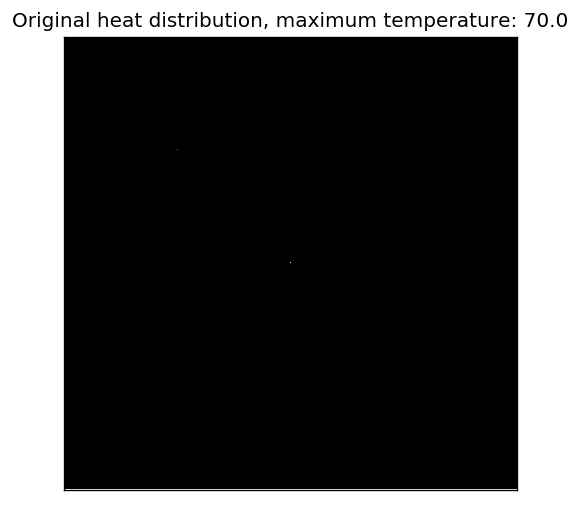

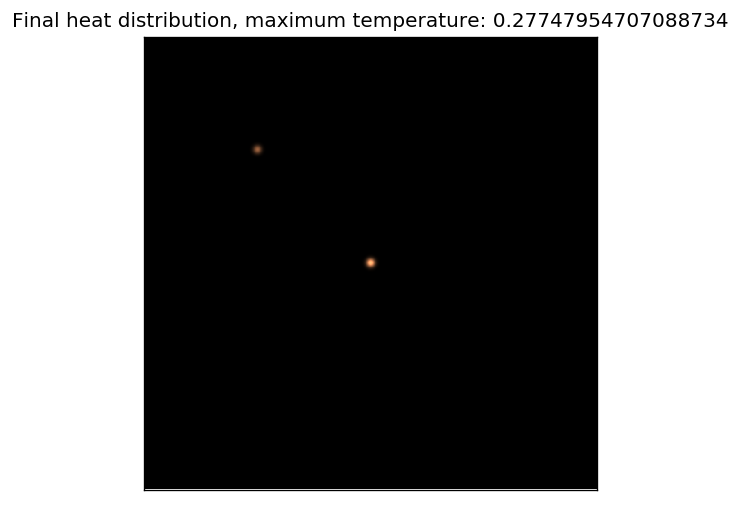

Solving time step t = 0.
Parallel processing took 20.889792919158936s


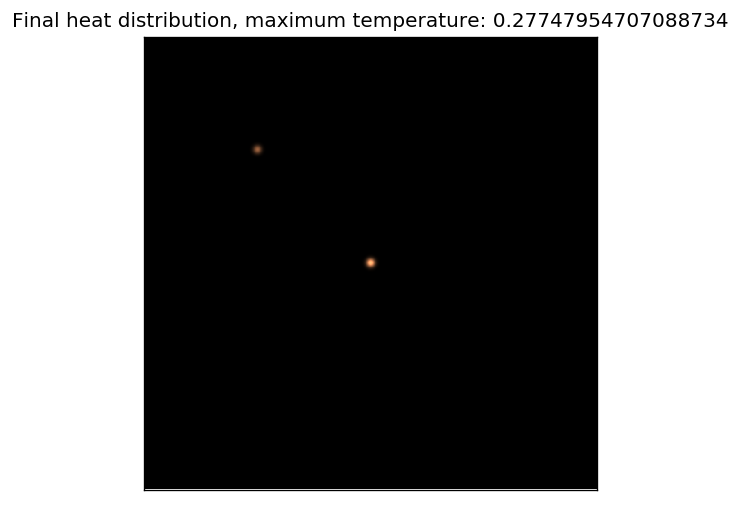

In [12]:
# Initialization:

dx = 0.5 # the lattice spacing; we will use the same lattice spacing in x and y directions, in meters
dt = 0.1 # time step, sec
L = 500  # system shape is square for convenience, in meters
T = 10  # integration time, sec
D = 0.5  # diffusion constant, in m/s^2

n_w = mp.cpu_count() # number of workers

# initial heat distribution
grid_init = np.zeros((int(L/dx),int(L/dx))) 
gridsize = grid_init.shape
grid_init[int(gridsize[0] / 2), int(gridsize[1] / 2)] = 70   # put a point source in the center, with intensity 70
grid_init[int(gridsize[0] / 4), int(gridsize[1] / 4)] = 35   # put a point source at a quarter corner, intensity 35

# solving the problem sequentially 
ts = time.time()  # measure computation time
grid_s = sequential (grid_init, D, T, dx, dt, reflecting)
print('Sequential processing took {}s'.format(time.time() - ts))

# now doing the plotting
fig, ax = plt.subplots(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.imshow(grid_init, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
plt.xticks([]); 
plt.yticks([]);
plt.title('Original heat distribution, maximum temperature: {}'.format(np.max(grid_init)))
plt.show()

fig, ax = plt.subplots(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
plt.imshow(grid_s, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
plt.xticks([]); 
plt.yticks([]);
plt.title('Final heat distribution, maximum temperature: {}'.format(np.max(grid_s)))
plt.show()

# solving the problem cincurrently
if __name__=='__main__':
    tp = time.time()  # measure computation time
    grid_p = parallel_reflecting(grid_init, D, T, dx, dt, n_w)
    print('Parallel processing took {}s'.format(time.time() - tp))
    fig, ax = plt.subplots(figsize=(5, 5), dpi= 120, facecolor='w', edgecolor='k')
    plt.imshow(grid_p, cmap=plt.cm.copper, extent=[-1,1,-1,1]);
    plt.xticks([])
    plt.yticks([])
    plt.title('Final heat distribution, maximum temperature: {}'.format(np.max(grid_p)))
    plt.show()


>### Your turn 6.11
Parallel processing code above is substantially (>15 times) slower that the sequential processing. Why? Which parts of the Euler loop take the longest? Can you suggest improvements?

>### Your turn 6.12
Write and verify functions for solving the diffusion equation on many processors with periodic and absorbing boundary conditions.

## Projects

The following three projects are available for this module. For each of these projects, you will need to develop a discretized space model of the process. You will then write code for sequential simulation of the system. Finally you will write code for simulation of the system using a pool of workers of an arbitrary size. In your report, you will need to output (besides the usual verification figures) the movies of the dynamics of the system, and a few snapshots of this dynamics for a more detailed analysis. After that, the final plot should be the time it took to solve the problem vs. the number of workers in the pool, for the number of workers going from 1 to 10 or so. What is the speedup that you observe for a different number of workers?

> ### Project 1: Conway's Game of Life (just fun)
Game of Life is a cellular automaton devised by John Conway, a mathematician, in 1970. The rules of the game are simple:
 - The game is played on a large (potentially infinite) orthogonal grid.
 - The game uses discrete time.
 - Each cell on a grid can be in two states: alive (1) or dead (0).
 - Every cell interacts with 8 of its neighbors to establish if it will be alive or dead at the next time step
 - The transition rules are
    - Any live cell with fewer than two lives neighbors dies (life is cooperative).
    - Any live cell with two or three live neighbors lives.
    - Any live cell with more than three live neighbors dies (overpopulation).
    - Any dead cell with exactly three live neighbors becomes alive (is reproduced into) .
    - All other dead cells remain dead.

> You can read more about the game in __[this Wikipedia article](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life)__. Develop a model of the Game on multiple processors (as described above), and simulate it on a large lattice (few hundred by few hundred cells). Start with random initial conditions and see which examples of "living" organisms you can generate. Classify them. Plot the time it takes to evolve the system for some fixed $T$ steps vs. the number of workers in the pool.  

> ### Project 2: Reaction-diffusion in development (biophysics)
A drosophila egg can be represented as an ellipsoid of rotation of about 500 um along the longest diameter, and half as long along the shortest. To start the development of a fertilized egg, a mother fly deposits a mRNA of a certain protein (bicoid) at the tip of the egg. The protein is translated from its mRNA (you should model this as a constant influx of bicoid molecules at the tip of the egg), and starts diffusing over the 3-d volume of the embryo with the diffusion coefficient of about 20 um$^2$/s (though there are complications, and the spread of the molecule is likely not purely diffusional). While the bicoid diffuses, it also degrades with the time scale of about 3 min (again, there are complications). As a result, a gradient of bicoid gets established, and, later in development, different parts of the embryo read out their position inside the embryo by measuring the bicoid concentrations next to them. Simulate the process of establishment of the bicoid gradient on multiple cores. For this, you will need to use not cubic, but ellipsoidal boundaries and set reflecting boundary conditions on them. Still work with a cubic lattice, but make the boundary conditions band elliptical (to the extent that you can on a square lattice). You will also need to supplement every diffusion step with a reaction step accounting for the decay of the bicoid. Produce a movie of the concentration field in the cross-section of the embryo. Graph the concentration along the major axis in steady state. Explore how this concentration depends on the diffusion constant and the decay time. How does the time to the steady state depend on the diffusion constant? Finally, plot the time it takes to evolve the system for some fixed $T$ steps vs. the number of workers in the pool.   

> ### <font color=green>Track 2: Project 3: Repressilator (biochemical kinetics)</font>
Recall <font color=green>Track 2: Master Equation and the dynamics of the probability distribution</font> section in Chapter 5, in which we studied how to model the dynamics of probability distributions of a number of molecules. Let's now study a slightly more complicated system of three interacting genes, $A,B,C$, arranged in a logical circle: gene $A$ suppresses $B$, $B$ suppresses $C$, and $C$ suppresses $A$. This is known as the *repressilator* circuit, which was __[developed in *E. coli* by Elowitz and Leibler](http://elowitz.caltech.edu/publications/Repressilator.pdf)__. The deterministic dynamics of this system is governed by the following equations. First, each of the three types of proteins are translated from messenger RNAs (mRNAs) $$\frac{dp_i}{dt}=a m_i-b p_i,$$ where $i=(A,B,C)$, $a$ and $b$ are constant rates, and $p$ and $m$ are protein and mRNA concentrations, respectively. In their turn, the production of mRNA is affected by the proteins that repress them, $$\frac{dm_i}{dt}=\alpha_0+\frac{\alpha}{K^2+p_{i-1}^2}-\beta m_i,$$ where $K,\alpha,\beta$ are constants, and protein species $A-1$ corresponds to $C$. This system is known to develop oscillations, where concentration of each of the proteins go up and down periodically. Write the master equation for this system following the approach we took in Chapter 5, and solve it on multiple cores (the lattice that you will have to build to represent the state of the system will be 6 dimensional: three proteins and three mRNAs). Find parameter values that make the system oscillate (feel free to use the original article by Elowitz and Leibler as an inspiration for parameter values). Show the graphs of the probability distribution $P(p_A)$ as a function of time. Finally, plot the time it takes to evolve the system for some fixed $T$ steps vs. the number of workers in the pool. 

> ### <font color=green>Track 2: Project 4: Belousov-Zhabotinsky reaction (chemical physics)</font>
__[Belousov-Zhabotinsky reaction](https://en.wikipedia.org/wiki/Belousov–Zhabotinsky_reaction)__ is a classic example of a nonlinear chemical oscillator based on propagation of waves in excitable media. It's typically modeled as an __[oregonator](https://en.wikipedia.org/wiki/Oregonator)__, with three differential equations describing species X, Y, and Z. Another good introduction is in __[Scholarpedia](http://www.scholarpedia.org/article/Oregonator)__; focus especially on the scaled form in Eqs. (4,5,6)). Now imagine that all species diffuse with similar (but not the same) diffusion constants. Set up such simulations on a square grid in 2d -- you need to keep track of concentration of all three species on every grid point, and, in addition to diffusion, there will be mass-action reactions on every site. Solbe this system using multiple cores and explore various diffusion constants. Find the parameter range at which the system, started with random initial conditions, develops the beautiful spiral waves seen in the first link above? Produce a movie of these waves. Finally, plot the time it takes to evolve the system for some fixed $T$ steps vs. the number of workers in the pool. 
